# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
%matplotlib inline

# Function Definitions

In [2]:
def x_t(t):    # Question 2a
    result = np.zeros(len(t))
    for i, val in enumerate(t):
        if val >= 1 and val < 2:
            result[i] = -1
        elif val >= 0 and val < 1:
            result[i] = 1
        else:
            result[i] = 0
    return result

In [3]:
def v_t(t):    # Question 2a
    result = np.zeros(len(t))
    for i, val in enumerate(t):
        if val >= -1 and val < 0:
            result[i] = np.exp(2*val)
        elif val >= 0 and val < 1:
            result[i] = np.exp(-2*val)
        else:
            result[i] = 0
    return result

In [4]:
def w_t(t):    # Question 2a
    result = np.zeros(len(t))
    for i, val in enumerate(t):
        if val >= -1 and val < 0:
            result[i] = 1+val
        elif val >= 0 and val < 1:
            result[i] = 1-val
        else:
            result[i] = 0
    return result

In [5]:
def z_t(t):    # Question 2a
    result = np.zeros(len(t))
    for i, val in enumerate(t):
        if val >= -1 and val < 1:
            result[i] = val
        else:
            result[i] = 0
    return result

In [6]:
def x_n(t):    # Question 2b
    result = np.zeros(len(t))
    for i, t in enumerate(t):
        if t>=-5 and t<=1:
            result[i] = 1
        else:
            result[i] = 0
    return result

In [7]:
def z_n(t):    # Question 2b
    result = np.zeros(len(t))
    for i, t in enumerate(t):
        if t>=0 and t<=3:
            result[i] = 1
        elif t>=4 and t<=8:
            result[i] = 2
        else:
            result[i] = 0
    return result

In [8]:
def w_n(t):    # Question 2b
    result = np.zeros(len(t))
    for i, t in enumerate(t):
        if t<=0 and t>=-4:
            result[i] = 3+t
        elif t>0 and t<=4:
            result[i] = 3-t
    return result

In [9]:
def d_t(t):    # Impulse Function
    result = np.zeros(len(t))
    for i, val in enumerate(t):
        if val == 0:
            result[i] = 1
        else:
            result[i] = 0
    return result

In [10]:
def u_t(t):    # Step Function
    result = np.zeros(len(t))
    for i, val in enumerate(t):
        if val >= 0:
            result[i] = 1
        else:
            result[i] = 0
    return result

In [11]:
def r_t(t):    # Ramp Function
    result = np.zeros(len(t))
    for i, val in enumerate(t):
        if val >= 0:
            result[i] = val
        else:
            result[i] = 0
    return result

In [12]:
def convolution_range(a, b):    # Calculates the range of convolution operations
    return np.arange(-(len(a)+len(b))/2,(len(a)+len(b))/2-1)

# Question 2

## (a)

### i

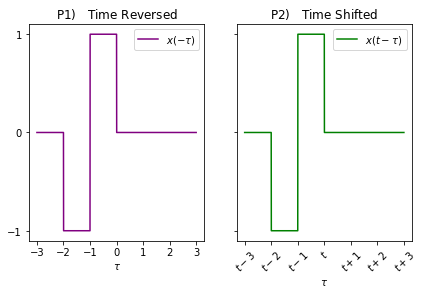

In [13]:
# Time reversal and time shift
delta = 0.001
tau = np.arange(-3, 3, delta)
dpi = 300

fig, axs = plt.subplots(1,2)

axs[0].set_xticks(np.arange(-4, 4, 1))
axs[0].set_yticks(np.arange(-1, 2, 1))
axs[0].plot(tau, x_t(-tau), label="$x(-\\tau)$", color="purple")
axs[0].set_title("P1)$\\quad$Time Reversed")
axs[0].legend()

axs[1].set_xticks(np.arange(-4, 4, 1))
axs[1].set_yticks(np.arange(-1, 2, 1))
xlabels = ["$t-4$", "$t-3$", "$t-2$", "$t-1$", "$t$", "$t+1$", "$t+2$", "$t+3$"]
axs[1].set_xticklabels(xlabels, rotation=45)
axs[1].plot(tau, x_t(-tau), label="$x(t-\\tau)$", color="green")
axs[1].set_title("P2)$\\quad$Time Shifted")
axs[1].legend()

fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel="$\\tau$")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
try:
    plt.savefig("figure_saves/q2a-i-start.png", dpi=dpi, bbox_inches='tight')
except FileNotFoundError:
    import os
    os.makedirs("figure_saves")
    plt.savefig("figure_saves/q2a-i-start.png", dpi=dpi, bbox_inches='tight')

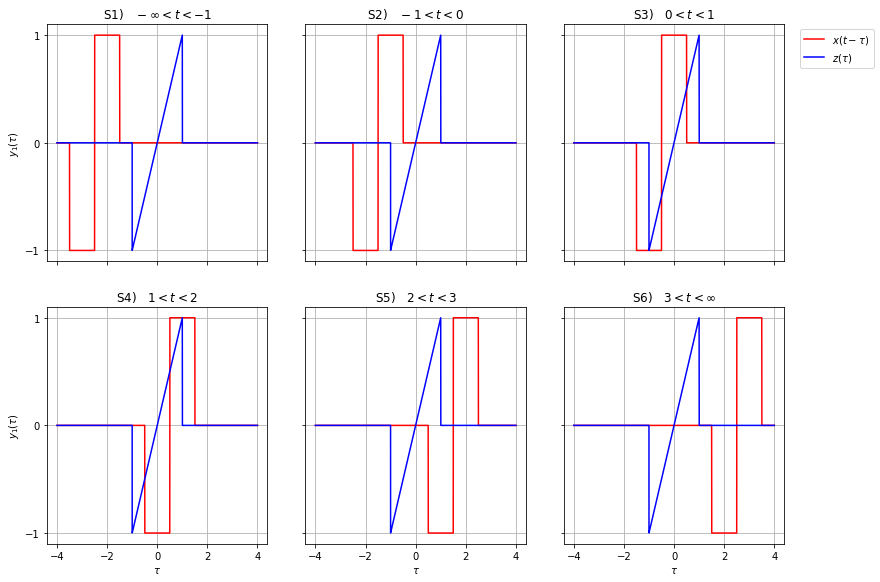

In [14]:
tau = np.arange(-4, 4, delta)
t_range = np.arange(-1.5, 4.5, 1)

vertical = 2
horizontal = 3
fig, axs = plt.subplots(vertical, horizontal)
idx = 0

for ver in range(vertical):
    for hor in range(horizontal):
        t_ = t_range[idx]
        axs[ver, hor].plot(tau, x_t(t_-tau), "red", label="$x(t-\\tau)$")
        axs[ver, hor].plot(tau, z_t(tau), "blue", label="$z(\\tau)$")
        axs[ver, hor].set_yticks(np.arange(-1, 2, 1))
        axs[ver, hor].grid()
        idx += 1

axs[0, 0].set_title("S1)$\\quad -\\infty<t<-1$")
axs[0, 1].set_title("S2)$\\quad -1<t<0$")
axs[0, 2].set_title("S3)$\\quad 0<t<1$")
axs[1, 0].set_title("S4)$\\quad 1<t<2$")
axs[1, 1].set_title("S5)$\\quad 2<t<3$")
axs[1, 2].set_title("S6)$\\quad 3<t<\\infty$")
        
axs[0, 2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout(rect=[0, 1, 2, 3])

for ax in axs.flat:
    ax.set(xlabel="$\\tau$", ylabel="$y_1(\\tau)$")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig("figure_saves/q2a-i-steps.png", dpi=dpi, bbox_inches='tight')

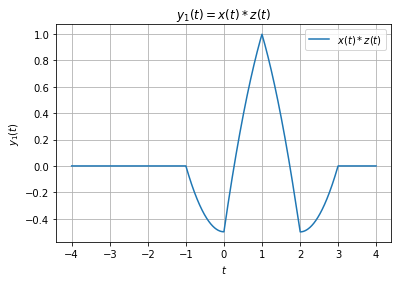

In [15]:
t = np.arange(-2, 2, delta)

y1_t = np.convolve(x_t(t), z_t(t))
plt.plot(convolution_range(x_t(t),z_t(t))*delta, y1_t*delta)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$y_1(t)$')
plt.legend(['$x(t)*z(t)$'])
plt.title("$y_1(t)=x(t)*z(t)$")
plt.savefig("figure_saves/q2a-i-ans.png", dpi=dpi)

### ii

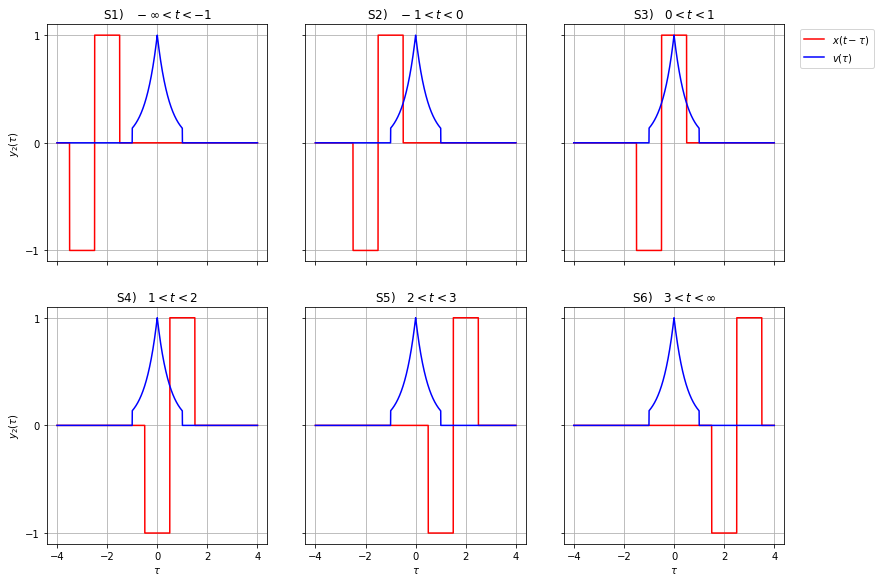

In [16]:
tau = np.arange(-4, 4, delta)
t_range = np.arange(-1.5, 4.5, 1)

fig, axs = plt.subplots(vertical,horizontal)
idx = 0

for ver in range(vertical):
    for hor in range(horizontal):
        t_ = t_range[idx]
        axs[ver, hor].plot(tau, x_t(t_-tau), "red", label="$x(t-\\tau)$")
        axs[ver, hor].plot(tau, v_t(tau), "blue", label="$v(\\tau)$")
        axs[ver, hor].set_yticks(np.arange(-1, 2, 1))
        axs[ver, hor].grid()
        idx += 1

axs[0, 0].set_title("S1)$\\quad -\\infty<t<-1$")
axs[0, 1].set_title("S2)$\\quad -1<t<0$")
axs[0, 2].set_title("S3)$\\quad 0<t<1$")
axs[1, 0].set_title("S4)$\\quad 1<t<2$")
axs[1, 1].set_title("S5)$\\quad 2<t<3$")
axs[1, 2].set_title("S6)$\\quad 3<t<\\infty$")
        
axs[0, 2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout(rect=[0, 1, 2, 3])

for ax in axs.flat:
    ax.set(xlabel="$\\tau$", ylabel="$y_2(\\tau)$")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig("figure_saves/q2a-ii-steps.png", dpi=dpi, bbox_inches='tight')

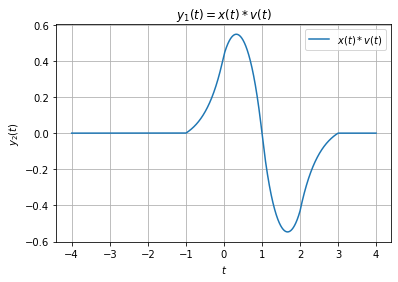

In [17]:
y2_t = np.convolve(x_t(t), v_t(t))
plt.plot(convolution_range(x_t(t),v_t(t))*delta, y2_t*delta)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$y_2(t)$')
plt.legend(['$x(t)*v(t)$'])
plt.title("$y_1(t)=x(t)*v(t)$")
plt.savefig("figure_saves/q2a-ii-ans.png", dpi=dpi)

### iii

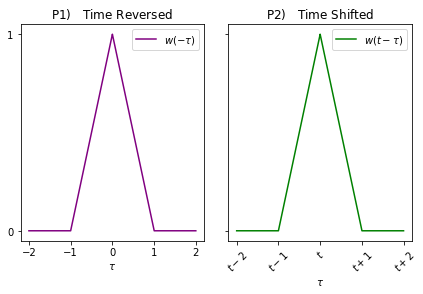

In [18]:
tau = np.arange(-2, 2, delta)
dpi = 300

fig, axs = plt.subplots(1,2)

axs[0].set_xticks(np.arange(-4, 4, 1))
axs[0].set_yticks(np.arange(-1, 2, 1))
axs[0].plot(tau, w_t(-tau), label="$w(-\\tau)$", color="purple")
axs[0].set_title("P1)$\\quad$Time Reversed")
axs[0].legend()

axs[1].set_xticks(np.arange(-4, 4, 1))
axs[1].set_yticks(np.arange(-1, 2, 1))
xlabels = ["$t-4$", "$t-3$", "$t-2$", "$t-1$", "$t$", "$t+1$", "$t+2$", "$t+3$"]
axs[1].set_xticklabels(xlabels, rotation=45)
axs[1].plot(tau, w_t(-tau), label="$w(t-\\tau)$", color="green")
axs[1].set_title("P2)$\\quad$Time Shifted")
axs[1].legend()

fig.tight_layout()

for ax in axs.flat:
    ax.set(xlabel="$\\tau$")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.savefig("figure_saves/q2a-iii-start.png", dpi=dpi, bbox_inches='tight')

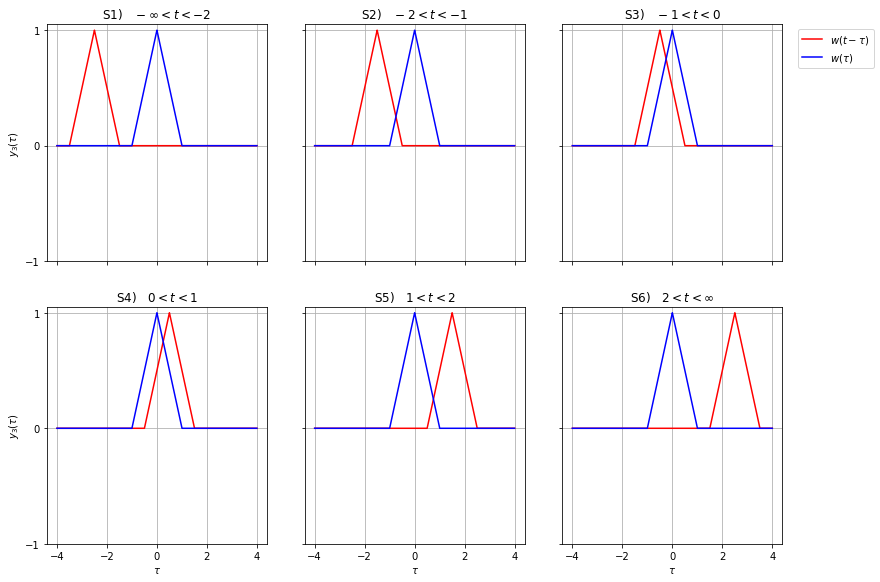

In [19]:
tau = np.arange(-4, 4, delta)
t_range = np.arange(-2.5, 3.5, 1)

fig, axs = plt.subplots(vertical,horizontal)
idx = 0

for ver in range(vertical):
    for hor in range(horizontal):
        t_ = t_range[idx]
        axs[ver, hor].plot(tau, w_t(t_-tau), "red", label="$w(t-\\tau)$")
        axs[ver, hor].plot(tau, w_t(tau), "blue", label="$w(\\tau)$")
        axs[ver, hor].set_yticks(np.arange(-1, 2, 1))
        axs[ver, hor].grid()
        idx += 1

axs[0, 0].set_title("S1)$\\quad -\\infty<t<-2$")
axs[0, 1].set_title("S2)$\\quad -2<t<-1$")
axs[0, 2].set_title("S3)$\\quad -1<t<0$")
axs[1, 0].set_title("S4)$\\quad 0<t<1$")
axs[1, 1].set_title("S5)$\\quad 1<t<2$")
axs[1, 2].set_title("S6)$\\quad 2<t<\\infty$")
        
axs[0, 2].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout(rect=[0, 1, 2, 3])

for ax in axs.flat:
    ax.set(xlabel="$\\tau$", ylabel="$y_3(\\tau)$")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.savefig("figure_saves/q2a-iii-steps.png", dpi=dpi, bbox_inches='tight')

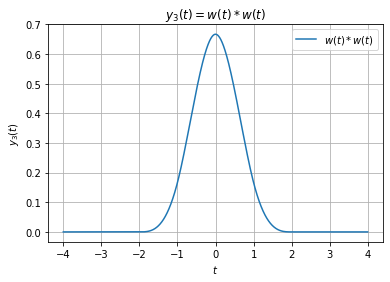

In [20]:
y3_t = np.convolve(w_t(t), w_t(t))
plt.plot(convolution_range(w_t(t),w_t(t))*delta, y3_t*delta)
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$y_3(t)$')
plt.legend(['$w(t)*w(t)$'])
plt.title("$y_3(t)=w(t)*w(t)$")
plt.savefig("figure_saves/q2a-iii-ans.png", dpi=dpi)

## (b)

### i

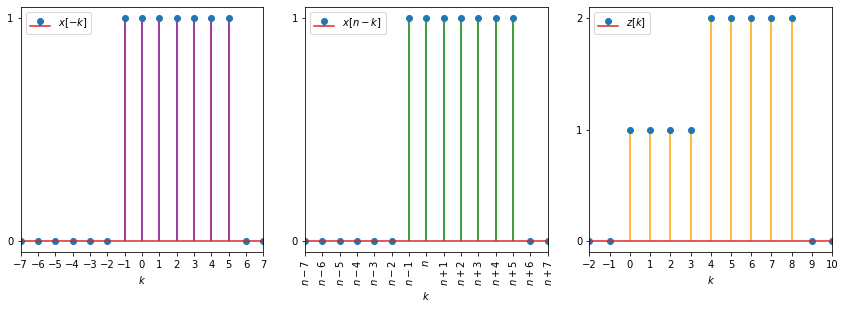

In [21]:
# Time reversal and time shift
k = np.arange(-10, 12, 1)

fig, axs = plt.subplots(1,3)
fig.tight_layout(rect=[0, 2, 2, 3])

axs[0].set_xlim(-7,7)
axs[0].set_xticks(np.arange(-7, 8, 1))
axs[0].set_yticks(np.arange(-1, 2, 1))
axs[0].stem(k, x_n(-k), label="$x[-k]$", linefmt="purple", use_line_collection=True)
axs[0].legend()

axs[1].set_xlim(-7,7)
axs[1].set_xticks(np.arange(-7, 8, 1))
axs[1].set_yticks(np.arange(-1, 2, 1))
xlabels = ["$n-7$", "$n-6$", "$n-5$", "$n-4$", "$n-3$", "$n-2$", "$n-1$", "$n$", "$n+1$", "$n+2$", "$n+3$", "$n+4$", "$n+5$", "$n+6$", "$n+7$"]
axs[1].set_xticklabels(xlabels, rotation=90)
axs[1].stem(k, x_n(-k), label="$x[n-k]$", linefmt="green", use_line_collection=True)
axs[1].legend()

axs[2].set_xlim(-2,10)
axs[2].set_xticks(np.arange(-2, 11, 1))
axs[2].set_yticks(np.arange(-1, 3, 1))
axs[2].stem(k, z_n(k), label="$z[k]$", linefmt="orange", use_line_collection=True)
axs[2].legend()

for ax in axs.flat:
    ax.set(xlabel="$k$")
    
plt.savefig("figure_saves/q2b-i-start.png", dpi=dpi, bbox_inches='tight')

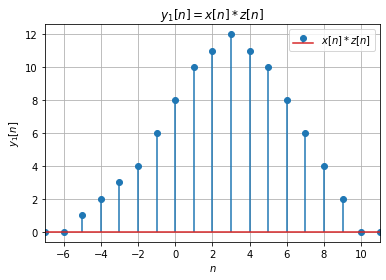

In [22]:
# Convolve
n = np.arange(-10, 10, 1)

y1_n = np.convolve(x_n(n), z_n(n))
plt.grid()
plt.stem(convolution_range(x_n(n), z_n(n)), y1_n, use_line_collection=True)
plt.xlim(-7, 11)
plt.xlabel('$n$')
plt.ylabel('$y_1[n]$')
plt.legend(['$x[n]*z[n]$'])
plt.title("$y_1[n]=x[n]*z[n]$")
plt.savefig("figure_saves/q2b-i-ans.png", dpi=dpi)

### ii

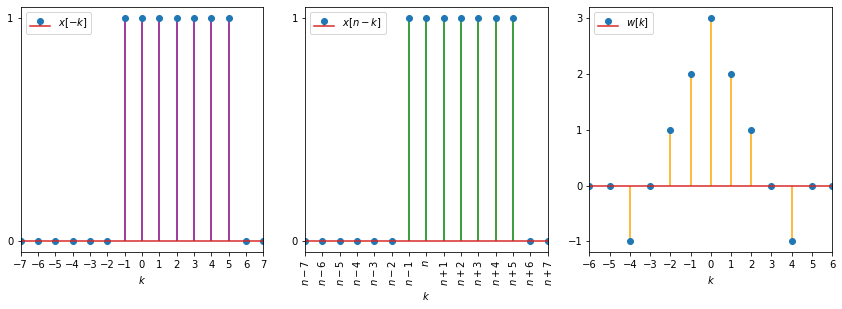

In [23]:
fig, axs = plt.subplots(1,3)
fig.tight_layout(rect=[0, 2, 2, 3])

axs[0].set_xlim(-7,7)
axs[0].set_xticks(np.arange(-7, 8, 1))
axs[0].set_yticks(np.arange(-1, 2, 1))
axs[0].stem(k, x_n(-k), label="$x[-k]$", linefmt="purple", use_line_collection=True)
axs[0].legend()

axs[1].set_xlim(-7,7)
axs[1].set_xticks(np.arange(-7, 8, 1))
axs[1].set_yticks(np.arange(-1, 2, 1))
xlabels = ["$n-7$", "$n-6$", "$n-5$", "$n-4$", "$n-3$", "$n-2$", "$n-1$", "$n$", "$n+1$", "$n+2$", "$n+3$", "$n+4$", "$n+5$", "$n+6$", "$n+7$"]
axs[1].set_xticklabels(xlabels, rotation=90)
axs[1].stem(k, x_n(-k), label="$x[n-k]$", linefmt="green", use_line_collection=True)
axs[1].legend()

axs[2].set_xlim(-6,6)
axs[2].set_xticks(np.arange(-6, 7, 1))
axs[2].set_yticks(np.arange(-1, 4, 1))
axs[2].stem(k, w_n(k), label="$w[k]$", linefmt="orange", use_line_collection=True)
axs[2].legend(loc="upper left")

for ax in axs.flat:
    ax.set(xlabel="$k$")
    
plt.savefig("figure_saves/q2b-ii-start.png", dpi=dpi, bbox_inches='tight')

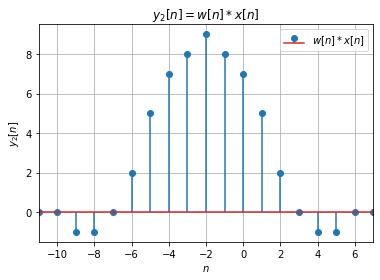

In [24]:
y2_n = np.convolve(w_n(n), x_n(n))
plt.grid()
plt.stem(convolution_range(w_n(n), x_n(n)), y2_n, use_line_collection=True)
plt.xlim(-11, 7)
plt.xlabel('$n$')
plt.ylabel('$y_2[n]$')
plt.legend(['$w[n]*x[n]$'])
plt.title("$y_2[n]=w[n]*x[n]$")
plt.savefig("figure_saves/q2b-ii-ans.png", dpi=dpi)

### iii

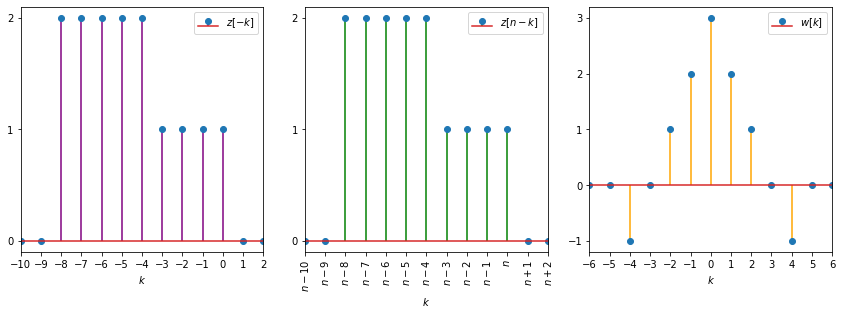

In [25]:
fig, axs = plt.subplots(1,3)
fig.tight_layout(rect=[0, 2, 2, 3])

axs[0].set_xlim(-10,2)
axs[0].set_xticks(np.arange(-10, 3, 1))
axs[0].set_yticks(np.arange(-1, 3, 1))
axs[0].stem(k, z_n(-k), label="$z[-k]$", linefmt="purple", use_line_collection=True)
axs[0].legend()

axs[1].set_xlim(-10,2)
axs[1].set_xticks(np.arange(-10, 3, 1))
axs[1].set_yticks(np.arange(-1, 3, 1))
xlabels = ["$n-10$", "$n-9$", "$n-8$", "$n-7$", "$n-6$", "$n-5$", "$n-4$", "$n-3$", "$n-2$", "$n-1$", "$n$", "$n+1$", "$n+2$", "$n+3$", "$n+4$"]
axs[1].set_xticklabels(xlabels, rotation=90)
axs[1].stem(k, z_n(-k), label="$z[n-k]$", linefmt="green", use_line_collection=True)
axs[1].legend()

axs[2].set_xlim(-6,6)
axs[2].set_xticks(np.arange(-6, 7, 1))
axs[2].set_yticks(np.arange(-1, 4, 1))
axs[2].stem(k, w_n(k), label="$w[k]$", linefmt="orange", use_line_collection=True)
axs[2].legend()

for ax in axs.flat:
    ax.set(xlabel="$k$")
    
plt.savefig("figure_saves/q2b-iii-start.png", dpi=dpi, bbox_inches='tight')

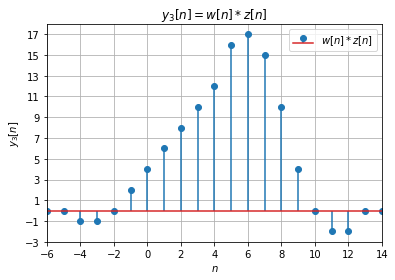

In [26]:
y3_n = np.convolve(w_n(n), z_n(n))
plt.grid()
plt.stem(convolution_range(w_n(n), z_n(n)), y3_n, use_line_collection=True)
plt.xlim(-6, 14)
plt.xlabel('$n$')
plt.ylabel('$y_3[n]$')
plt.legend(['$w[n]*z[n]$'])
plt.title("$y_3[n]=w[n]*z[n]$")
plt.xticks(np.arange(-6, 15, 2))
plt.yticks(np.arange(-3, 18, 2))
plt.savefig("figure_saves/q2b-iii-ans.png", dpi=dpi)

# Question 4

### (b)

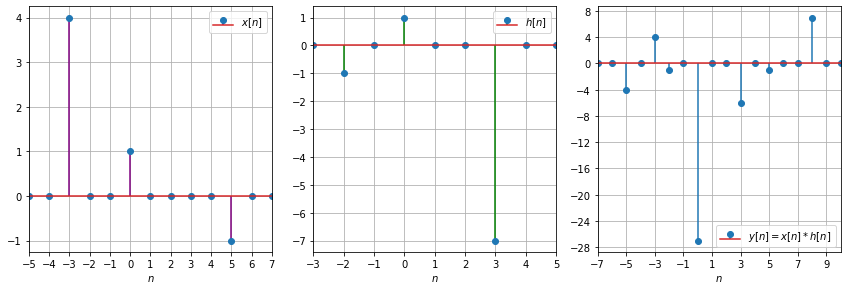

In [27]:
def d_t(t):    # Impulse Function
    result = np.zeros(len(t))
    for i, val in enumerate(t):
        if val == 0:
            result[i] = 1
        else:
            result[i] = 0
    return result

dpi=300
n = np.arange(-10, 10, 1)
x_n = d_t(n) - d_t(n-5) + 4*d_t(n+3)
h_n = d_t(n) - d_t(n+2) - 7*d_t(n-3)
y_n = np.convolve(x_n, h_n)

fig, axs = plt.subplots(1,3)
fig.tight_layout(rect=[0, 2, 2, 3])

axs[0].set_xlim(-5,7)
axs[0].set_xticks(np.arange(-5, 8, 1))
axs[0].stem(n, x_n, label="$x[n]$", linefmt="purple", use_line_collection=True)
axs[0].legend(["$x[n]$"])
axs[0].grid()

axs[1].set_xlim(-3,5)
axs[1].stem(n, h_n, label="$h[n]$", linefmt="green", use_line_collection=True)
axs[1].legend(["$h[n]$"])
axs[1].grid()

axs[2].set_xlim(-7,10)
axs[2].set_xticks(np.arange(-7, 11, 2))
axs[2].set_yticks(np.arange(-28, 9, 4))
axs[2].stem(convolution_range(x_n, h_n), y_n, label="$y[n]$", use_line_collection=True)
axs[2].legend(['$y[n]=x[n]*h[n]$'], loc="lower right")
axs[2].grid()

for ax in axs.flat:
    ax.set(xlabel="$n$")
    
plt.savefig("figure_saves/q4b-ans.png", dpi=dpi, bbox_inches='tight')

# Question 5

## (a)

In [28]:
import librosa                    
from scipy.io import wavfile

In [29]:
sampling_freq, noisy_data = wavfile.read("suphi_dirty.wav")
sampling_freq, clean_data = wavfile.read("suphi_clean.wav")
noisy_data = noisy_data.astype("int64")
clean_data = clean_data.astype("int64")
noisy_L = noisy_data[:,0]; noisy_R = noisy_data[:,1]
clean_L = clean_data[:,0]; clean_R = clean_data[:,1]

In [30]:
# def convolve(x1, x2):    # Alternative to np.convolve() (Not very efficient)
#     # Run shorter signal over longer
#     if len(x1)>len(x2):
#         tmp = x1
#         x1 = x2
#         x2 = tmp
    
#     conv_length = len(x1)+len(x2)-1
#     conv = np.zeros(conv_length)
#     x1 = np.flip(x1)
#     pad2 = len(x1)-1
    
#     for idx in range(conv_length):
#         pad1_start = idx
#         pad1_end = conv_length - idx - 1

#         padded_x1 = np.pad(x1, (pad1_start, pad1_end), "constant")
#         padded_x2 = np.pad(x2, (pad2, pad2), "constant")
#         conv[idx] = np.sum(padded_x1*padded_x2)
    
#     return conv

In [31]:
# Requires n (time signal) for proper definition of the mask
# def raf_mask(n_point, n):
#     mask = np.zeros(len(n))
#     for idx in range(n_point):
#         mask += d_t(n-idx)
#     mask = mask/n_point
#     return mask

# Simpler masking function (mask = sum_{k=-n_point/2}^{n_point/2}delta[n-k], 
# therefore requires time shifting for causality)
# def raf_mask(n_point):
#     mask = np.zeros(n_point)
#     for idx in range(n_point):
#         mask[idx] += 1/n_point
#     return mask

In [32]:
def raf(signal, n_point, output="full"):
    
    if output == "same":
        # Return the signal with the same shape
        conv_length = len(signal)
        filtered = np.zeros(conv_length)
        for idx in range(n_point, conv_length):
            filtered[idx-n_point] = np.sum(signal[idx-n_point:idx])/n_point
    else:
        conv_length = len(signal)+n_point-1
        filtered = np.zeros(conv_length)
        signal = np.pad(signal, (n_point-1,0), "constant")
        for idx in range(n_point, conv_length):
            filtered[idx-n_point] = np.sum(signal[idx-n_point:idx])/n_point
    
    return filtered

In [33]:
def medf(signal, n_point, output="full"):
    
    if output == "same":
        conv_length = len(signal)
        filtered = np.zeros(conv_length)
        for idx in range(n_point, conv_length):
            filtered[idx-n_point] = np.median(signal[idx-n_point:idx])
    else:
        conv_length = len(signal)+n_point-1
        filtered = np.zeros(conv_length)
        signal = np.pad(signal, (n_point-1,0), "constant")
        for idx in range(n_point, conv_length):
            filtered[idx-n_point] = np.median(signal[idx-n_point:idx])

    return filtered

In [34]:
# from numba import jit, prange
# @jit(nopython=True)
# def raf_jit(signal, n_point):
#     conv_length = len(signal)
#     filtered = np.empty(conv_length)
#     for idx in prange(conv_length):
#         filtered[idx] = np.sum(np.divide(signal[idx:idx+n_point], n_point))
#     return filtered

# @jit(nopython=True)
# def medf_jit(signal, n_point):
#     conv_length = len(signal)
#     filtered = np.empty(conv_length)
#     for idx in prange(conv_length):
#         filtered[idx] = np.median(signal[idx:idx+n_point])
#     return filtered

In [35]:
n_average_points = 3
suphi_raf_L = raf(noisy_L, n_average_points, "same")
suphi_raf_R = raf(noisy_R, n_average_points, "same")
suphi_raf = np.column_stack((suphi_raf_L, suphi_raf_R))

In [36]:
n_median_points = 3
suphi_medf_L = medf(noisy_L, n_median_points, "same")
suphi_medf_R = medf(noisy_R, n_median_points, "same")
suphi_medf = np.column_stack((suphi_medf_L, suphi_medf_R))

## (b)

In [37]:
def mse(s1, s2):
    error = (np.square(s1 - s2)).mean(axis=None)
    return error

In [38]:
raf_mse = mse(suphi_raf, clean_data)
medf_mse = mse(suphi_medf, clean_data)
raw_mse = mse(noisy_data, clean_data)
print("Running Average Filter MSE: {}\nMedian Filter MSE: {}\nMSE of Noisy Data: {}".format(raf_mse, medf_mse, raw_mse))
print("# of Running Average Filter Points: {}\n# of Median Filter Points: {}".format(n_average_points, n_median_points))

Running Average Filter MSE: 65881.89909874268
Median Filter MSE: 72053.90418144589
MSE of Noisy Data: 27314.423006708304
# of Running Average Filter Points: 3
# of Median Filter Points: 3


In [39]:
# # Grid search of best MSE
# from tqdm.notebook import trange
# import sys

# length = len(noisy_L)
# best_mse = 27314.42301
# best_kernel = 1

# for n_average_points in trange(length, desc="Grid Search"):
#     suphi_raf_L_gpu = raf_jit(noisy_L, n_average_points+1)
#     suphi_raf_R_gpu = raf_jit(noisy_R, n_average_points+1)
#     suphi_raf_gpu = np.column_stack((suphi_raf_L_gpu, suphi_raf_R_gpu)).astype("int16")
#     raf_mse = mse(suphi_raf_gpu, clean_data)
#     print(raf_mse, " ", n_average_points)
#     if raf_mse < best_mse:
#         best_mse = raf_mse
#         best_kernel = n_average_points + 1
#     if n_average_points % 100 == 0:
#         print("Best MSE yet: {}\nBest kernel length yet: {}".format(best_mse, best_kernel))
#         print("Current MSE: {}".format(raf_mse))

# print("\nSearch Finished!\nBest RAF MSE: {}\nBest Kernel Length: {}".format(best_mse, best_kernel))

In [40]:
# length = len(noisy_L)
# best_mse = 27314.42301
# best_kernel = 1

# for n_median_points in trange(length, desc="Grid Search"):
#     suphi_medf_L_gpu = medf_jit(np.array(noisy_L), n_median_points+1)
#     suphi_medf_R_gpu = medf_jit(np.array(noisy_R), n_median_points+1)
#     suphi_medf_gpu = np.column_stack((suphi_medf_L_gpu, suphi_medf_R_gpu)).astype("int16")
#     medf_mse = mse(suphi_medf_gpu, clean_data)
#     print(medf_mse, " ", n_median_points)
#     if medf_mse < best_mse:
#         best_mse = medf_mse
#         best_kernel = n_median_points + 1
#     if n_median_points % 100 == 0:
#         print("Best MSE yet: {}\nBest kernel length yet: {}".format(best_mse, best_kernel))

# print("\nSearch Finished!\nBest MEDF MSE: {}\nBest Kernel Length: {}".format(best_mse, best_kernel))

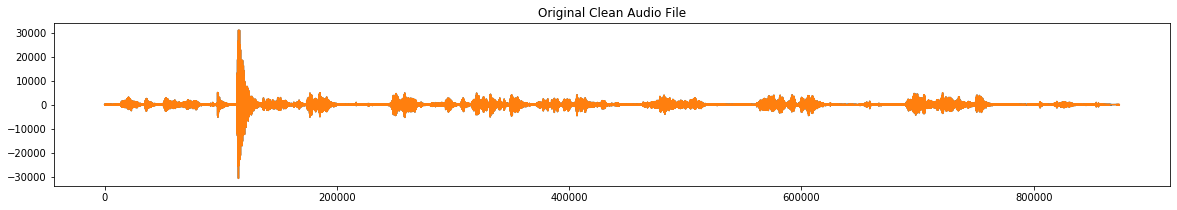

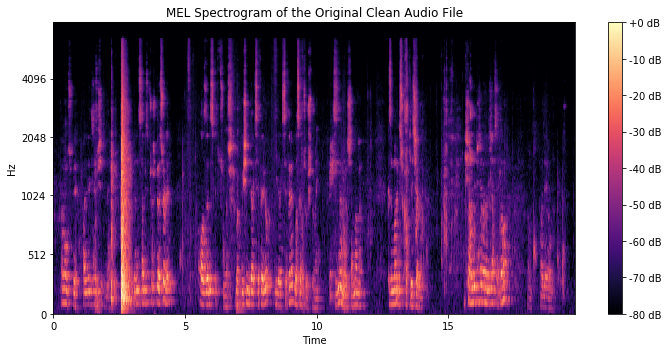

In [41]:
import librosa.display
import IPython

fig, ax = plt.subplots(figsize=(20,3))
ax.set_title("Original Clean Audio File")
ax.plot(clean_data)
plt.savefig("figure_saves/q5b-clean.png", dpi=dpi)

clean_data_mel = librosa.feature.melspectrogram(y=clean_data[:,0].astype(float), sr=sampling_freq, n_mels=128)
clean_data_mel_dB = librosa.power_to_db(clean_data_mel, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(clean_data_mel_dB, x_axis='time', y_axis='mel', sr=sampling_freq, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MEL Spectrogram of the Original Clean Audio File")
plt.tight_layout()
plt.savefig("figure_saves/q5b-clean-mel.png", dpi=dpi)

# Listen to the audio file
# IPython.display.Audio(data=[clean_data[:,0], clean_data[:,1]], rate=sampling_freq)

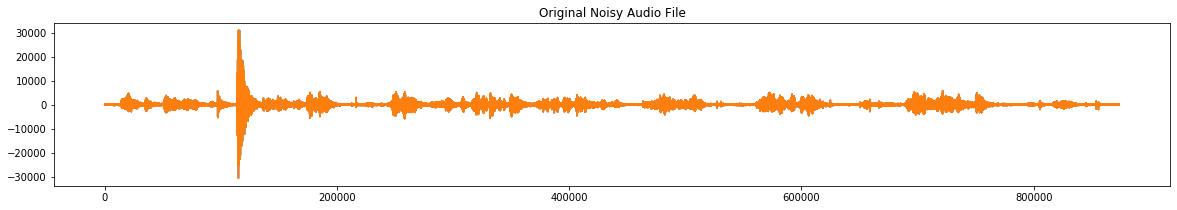

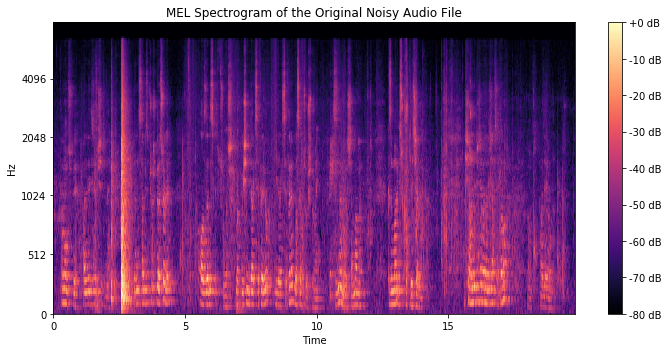

In [42]:
fig, ax = plt.subplots(figsize=(20,3))
ax.set_title("Original Noisy Audio File")
ax.plot(noisy_data)
plt.savefig("figure_saves/q5b-noisy.png", dpi=dpi)

noisy_data_mel = librosa.feature.melspectrogram(y=noisy_data[:,0].astype(float), sr=sampling_freq, n_mels=128)
noisy_data_mel_dB = librosa.power_to_db(noisy_data_mel, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(noisy_data_mel_dB, x_axis='time', y_axis='mel', sr=sampling_freq, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MEL Spectrogram of the Original Noisy Audio File")
plt.tight_layout()
plt.savefig("figure_saves/q5b-noisy-mel.png", dpi=dpi)

# IPython.display.Audio(data=[noisy_data[:,0], noisy_data[:,1]], rate=sampling_freq)

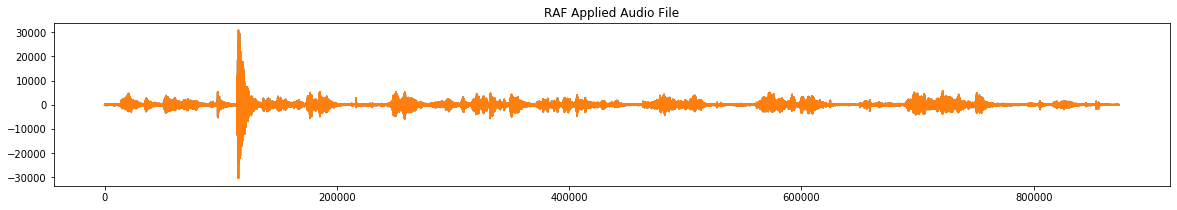

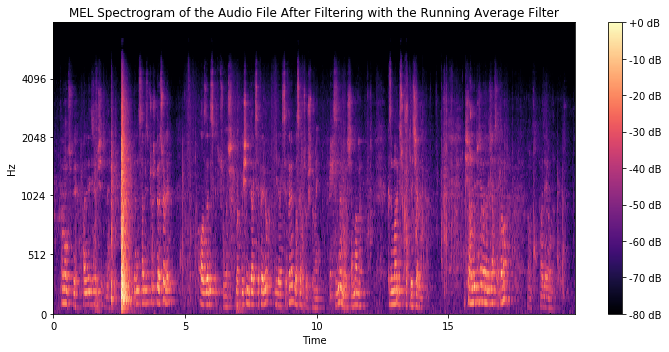

In [43]:
fig, ax = plt.subplots(figsize=(20,3))
ax.set_title("RAF Applied Audio File")
ax.plot(suphi_raf)
plt.savefig("figure_saves/q5b-raf.png", dpi=dpi)

suphi_raf_mel = librosa.feature.melspectrogram(y=suphi_raf[:,0].astype(float), sr=sampling_freq, n_mels=128)
suphi_raf_mel_dB = librosa.power_to_db(suphi_raf_mel, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(suphi_raf_mel_dB, x_axis='time', y_axis='mel', sr=sampling_freq, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MEL Spectrogram of the Audio File After Filtering with the Running Average Filter")
plt.tight_layout()
plt.savefig("figure_saves/q5b-raf-mel.png", dpi=dpi)

# IPython.display.Audio(data=[suphi_raf[:,0], suphi_raf[:,1]], rate=sampling_freq)

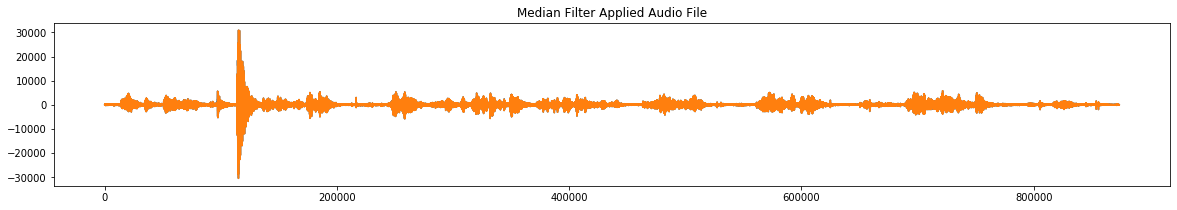

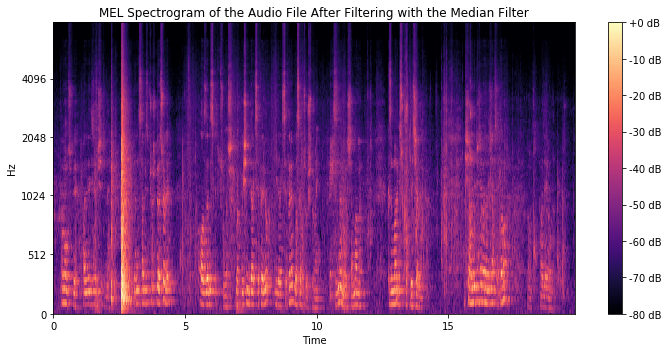

In [44]:
fig, ax = plt.subplots(figsize=(20,3))
ax.set_title("Median Filter Applied Audio File")
ax.plot(suphi_medf)
plt.savefig("figure_saves/q5b-medf.png", dpi=dpi)

suphi_medf_mel = librosa.feature.melspectrogram(y=suphi_medf[:,0].astype(float), sr=sampling_freq, n_mels=128)
suphi_medf_mel_dB = librosa.power_to_db(suphi_medf_mel, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(suphi_medf_mel_dB, x_axis='time', y_axis='mel', sr=sampling_freq, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MEL Spectrogram of the Audio File After Filtering with the Median Filter")
plt.tight_layout()
plt.savefig("figure_saves/q5b-medf-mel.png", dpi=dpi)

# IPython.display.Audio(data=[suphi_medf[:,0], suphi_medf[:,1]], rate=sampling_freq)

## Obtaining the Challenge Output (MSE = 4381)

## Noise Reducer Algorithm

In [45]:
def _stft(y, n_fft, hop_length, win_length):
    return librosa.stft(y=y, n_fft=n_fft, hop_length=hop_length, win_length=win_length, center=True)


def _istft(y, n_fft, hop_length, win_length):
    return librosa.istft(y, hop_length, win_length)


def _amp_to_db(x):
    return librosa.core.amplitude_to_db(x, ref=1.0, amin=1e-20, top_db=80.0)


def _smoothing_filter(n_grad_freq, n_grad_time):
    smoothing_filter = np.outer(np.concatenate([np.linspace(0, 1, n_grad_freq + 1, endpoint=False),
                                                np.linspace(1, 0, n_grad_freq + 2),])[1:-1],
                                np.concatenate([np.linspace(0, 1, n_grad_time + 1, endpoint=False), 
                                                np.linspace(1, 0, n_grad_time + 2),])[1:-1],)
    smoothing_filter = smoothing_filter / np.sum(smoothing_filter)
    return smoothing_filter


def mask_signal(sig_stft, sig_mask):
    sig_stft_amp = sig_stft * (1 - sig_mask)
    return sig_stft_amp


def convolve_gaussian(sig_mask, smoothing_filter):
    return scipy.signal.fftconvolve(sig_mask, smoothing_filter, mode="same")

In [46]:
def reduce_noise(audio_clip, noise_clip, prop_decrease=1.0, n_grad_freq=2, n_grad_time=4, n_fft=2048,
                 win_length=2048, hop_length=512, n_std_thresh=1.5, pad_clipping=True):
    
    # STFT over noise
    noise_stft = _stft(noise_clip, n_fft, hop_length, win_length)
    noise_stft_db = _amp_to_db(np.abs(noise_stft))  # convert to dB
    # Calculate statistics over noise
    mean_freq_noise = np.mean(noise_stft_db, axis=1)
    std_freq_noise = np.std(noise_stft_db, axis=1)
    noise_thresh = mean_freq_noise + std_freq_noise * n_std_thresh
    
    # pad signal with zeros to avoid extra frames being clipped if desired
    if pad_clipping:
        nsamp = len(audio_clip)
        audio_clip = np.pad(audio_clip, [0, hop_length], mode="constant")
    # STFT over signal
    sig_stft = _stft(audio_clip, n_fft, hop_length, win_length)
    # spectrogram of signal in dB
    sig_stft_db = _amp_to_db(np.abs(sig_stft))

    # calculate the threshold for each frequency/time bin
    db_thresh = np.repeat(np.reshape(noise_thresh, [1, len(mean_freq_noise)]), np.shape(sig_stft_db)[1], axis=0,).T
    # mask if the signal is above the threshold
    sig_mask = sig_stft_db < db_thresh
    # Create a smoothing filter for the mask in time and frequency
    smoothing_filter = _smoothing_filter(n_grad_freq, n_grad_time)

    # convolve the mask with a smoothing filter
    sig_mask = convolve_gaussian(sig_mask, smoothing_filter)
    sig_mask = scipy.signal.fftconvolve(sig_mask, smoothing_filter, mode="same")
    sig_mask = sig_mask * prop_decrease
    # mask the signal
    sig_stft_amp = mask_signal(sig_stft, sig_mask)

    # recover the signal
    recovered_signal = _istft(sig_stft_amp, n_fft, hop_length, win_length)
    # fix the recovered signal length if padding signal
    if pad_clipping:
        recovered_signal = librosa.util.fix_length(recovered_signal, nsamp)

    recovered_spec = _amp_to_db(np.abs(_stft(recovered_signal, n_fft, hop_length, win_length)))
    return recovered_signal

## Read the Data and Plot

In [47]:
sampling_freq, noisy_data = wavfile.read("suphi_dirty.wav")
sampling_freq, clean_data = wavfile.read("suphi_clean.wav")
noisy_data = noisy_data.astype("float")
clean_data = clean_data.astype("float")
noisy_L = noisy_data[:,0]; noisy_R = noisy_data[:,1]
clean_L = clean_data[:,0]; clean_R = clean_data[:,1]

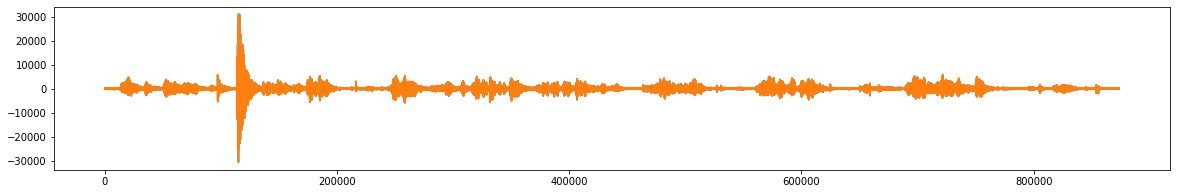

In [48]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noisy_data)
# IPython.display.Audio(data=[noisy_data[:,0], noisy_data[:,1]], rate=sampling_freq)

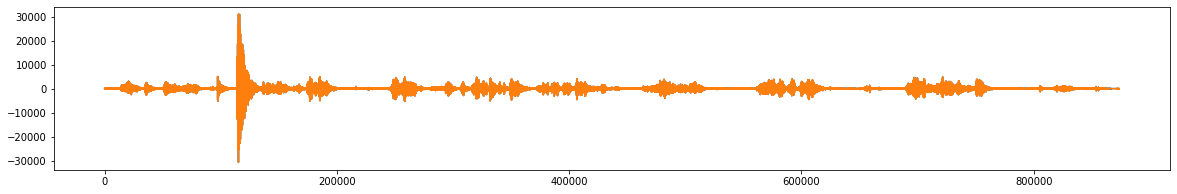

In [49]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(clean_data)
# IPython.display.Audio(data=[clean_data[:,0], clean_data[:,1]], rate=sampling_freq)

# Sample Noises

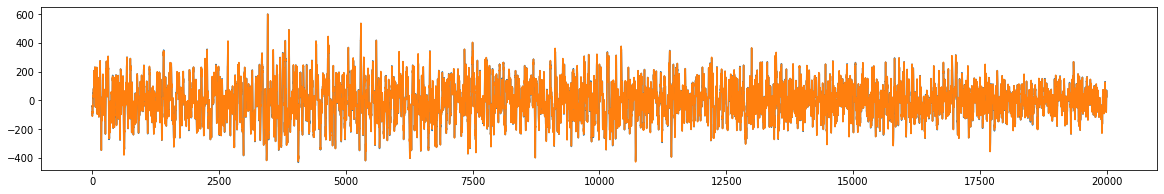

In [50]:
sample_noises = [noisy_data[770000:790000], noisy_data[520000:560000], noisy_data[200000:240000],
                 noisy_data[620000:690000], noisy_data[535000:560000], noisy_data[:14000]]

idx = 0
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(sample_noises[idx])
# IPython.display.Audio(data=[sample_noises[idx][:,0], sample_noises[idx][:,1]], rate=sampling_freq)

## Grid Search for the Best Result

In [51]:
# # Grid search (can be commented out)
# def search_best_mse(sample_noises):
#     best_mse = 27000
#     idx = 1
#     prop_decrease = 0.80
#     n_fft = 2048
#     win_length = 2048
#     hop_length = 256
#     n_std_thresh = 2.05
#     n_grad_freq = 2
#     n_grad_time = 2
#     for idx in range(len(sample_noises)):
#         for prop_decrease in np.arange(0, 1.05, 0.05):
#             for n_fft in (2 ** (np.arange(6,14,1)+1)):
#                 for win_length in (2 ** (np.arange(4)+8)):
#                     for hop_length in (2 ** (np.arange(6,14,1)+1)):
#                         for n_std_thresh in np.arange(1, 2.55, 0.05):
#                             for n_grad_freq in np.arange(1, 17, 1):
#                                 for n_grad_time in np.arange(1, 17, 1):
#                                     noise_reduced_L = nr.reduce_noise(audio_clip=noisy_data[:,0], noise_clip=sample_noises[idx][:,0], prop_decrease=prop_decrease, n_fft=n_fft, win_length=win_length, hop_length=hop_length, n_std_thresh=n_std_thresh, n_grad_freq=n_grad_freq, n_grad_time=n_grad_time)
#                                     noise_reduced_R = nr.reduce_noise(audio_clip=noisy_data[:,1], noise_clip=sample_noises[idx][:,1], prop_decrease=prop_decrease, n_fft=n_fft, win_length=win_length, hop_length=hop_length, n_std_thresh=n_std_thresh, n_grad_freq=n_grad_freq, n_grad_time=n_grad_time)
#                                     noise_reduced_data = np.column_stack((noise_reduced_L, noise_reduced_R))
#                                     current_mse = (np.square(clean_data-noise_reduced_data)).mean(axis=None)
#                                     if current_mse < best_mse:
#                                         best_mse = current_mse
#                                         best_idx = idx
#                                         best_prop = prop_decrease
#                                         best_n_fft = n_fft
#                                         best_win_length = win_length
#                                         best_hop_length = hop_length
#                                         best_n_std_thresh = n_std_thresh
#                                         best_n_grad_freq = n_grad_freq
#                                         best_n_grad_time = n_grad_time
#                                         print("Best combination:\nMSE: {:.4f}, sample_idx: {}, prop: {:03.2f}, n_fft: {}, win_l: {}, hop_l: {}, std_thresh: {:03.2f}, n_grad_freq: {}, n_grad_time: {}".format(best_mse, best_idx, best_prop, best_n_fft, best_win_length, best_hop_length, best_n_std_thresh, n_grad_freq, n_grad_time))

# search_best_mse(sample_noises)

## Run the Algorithm and Visualize the Output

In [52]:
# Check if grid search has been run before and update values
try:
    noise_clip = sample_noises[best_idx]
    prop_decrease = best_prop
    n_fft = best_n_fft
    win_length = best_win_length
    hop_length = best_hop_length
    n_std_thresh = best_n_std_thresh
    n_grad_freq = best_n_grad_freq
    n_grad_time = best_n_grad_time
except NameError:
    noise_clip = sample_noises[1]
    prop_decrease = 0.80
    n_fft = 2048
    win_length = 2048
    hop_length = 256
    n_std_thresh = 2.05
    n_grad_freq = 2
    n_grad_time = 2
    
noise_reduced_L = reduce_noise(audio_clip=noisy_data[:,0].astype(float), noise_clip=noise_clip[:,0].astype(float), prop_decrease=prop_decrease, n_fft=n_fft, win_length=win_length, hop_length=hop_length, n_std_thresh=n_std_thresh, n_grad_freq=n_grad_freq, n_grad_time=n_grad_time)
noise_reduced_R = reduce_noise(audio_clip=noisy_data[:,1].astype(float), noise_clip=noise_clip[:,1].astype(float), prop_decrease=prop_decrease, n_fft=n_fft, win_length=win_length, hop_length=hop_length, n_std_thresh=n_std_thresh, n_grad_freq=n_grad_freq, n_grad_time=n_grad_time)
noise_reduced_data = np.column_stack((noise_reduced_L, noise_reduced_R))

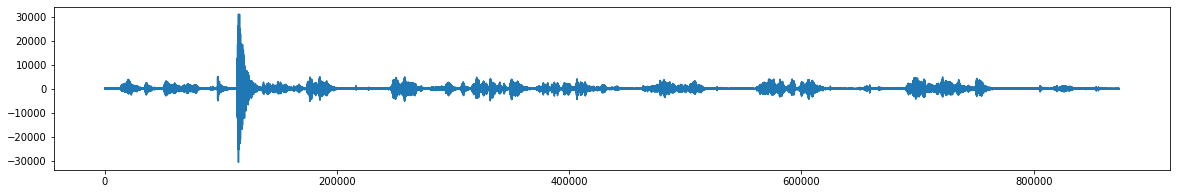

In [53]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced_data[:,0])
# IPython.display.Audio(data=[noise_reduced_data[:,0], noise_reduced_data[:,1]], rate=sampling_freq)

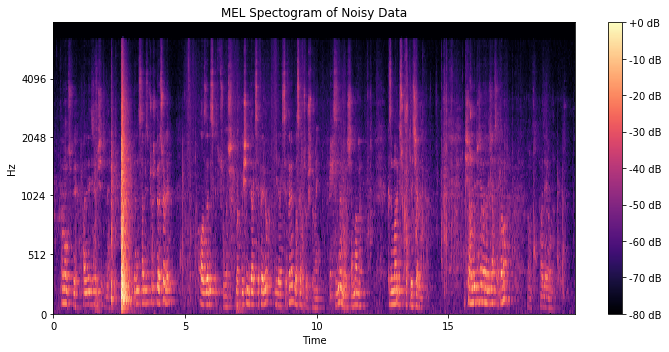

In [54]:
noisy_data_mel = librosa.feature.melspectrogram(y=noisy_data[:,0].astype(float), sr=sampling_freq, n_mels=128)
noisy_data_mel_dB = librosa.power_to_db(noisy_data_mel, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(noisy_data_mel_dB, x_axis='time', y_axis='mel', sr=sampling_freq, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MEL Spectogram of Noisy Data")
plt.tight_layout()
plt.show()

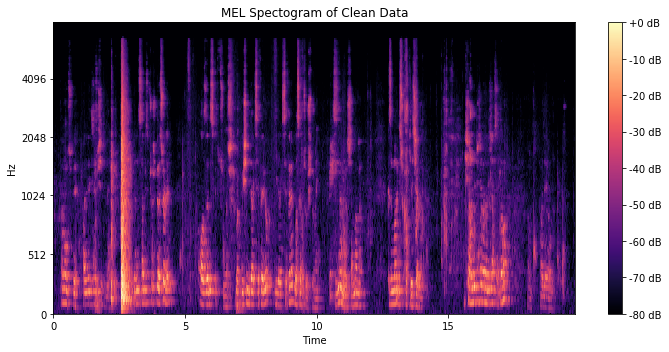

In [55]:
clean_data_mel = librosa.feature.melspectrogram(y=clean_data[:,0].astype(float), sr=sampling_freq, n_mels=128)
clean_data_mel_dB = librosa.power_to_db(clean_data_mel, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(clean_data_mel_dB, x_axis='time', y_axis='mel', sr=sampling_freq, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MEL Spectogram of Clean Data")
plt.tight_layout()
plt.show()

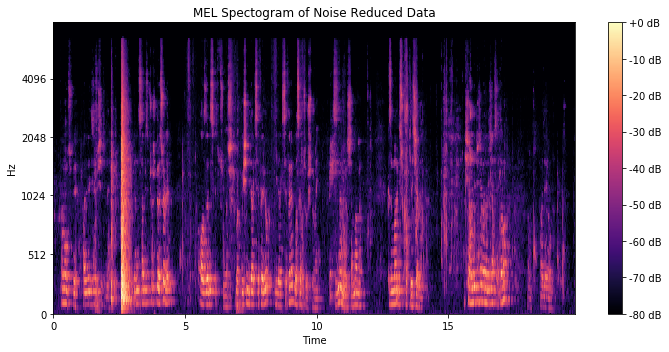

In [56]:
noise_reduced_mel = librosa.feature.melspectrogram(y=noise_reduced_data[:,0], sr=sampling_freq, n_mels=128)
noise_reduced_mel_dB = librosa.power_to_db(noise_reduced_mel, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(noise_reduced_mel_dB, x_axis='time', y_axis='mel', sr=sampling_freq, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MEL Spectogram of Noise Reduced Data")
plt.tight_layout()
plt.show()

## Calculate the Final MSE and Output the Data to CSV Format

In [57]:
noise_reduced_data = noise_reduced_data.astype("int64")
final_mse = mse(noise_reduced_data, clean_data)
print("Mean Square Error: {:.4f}".format(final_mse))

Mean Square Error: 4380.9618


In [58]:
import pandas as pd

df = pd.DataFrame(noise_reduced_data)
df.to_csv("suphi_denoised_MSE-{:.0f}.csv".format(final_mse), header=["Left", "Right"], index=True, index_label="SampleID")